This was created by https://github.com/LeihuaYe/Bootstrap_in_Python/blob/main/Bootstrap%20in%20Python%20(Github).ipynb

# Project: Bootstrap in Data Science Interviews

# Question 1: Bootstrap and Confidence Interval

# How to use a bootstrap method to estimate the population parameter?

# step 1: simulate population distribution

In [22]:
import numpy as np 
import matplotlib.pyplot as plt

np.random.seed(123) # to set seed for consistency 
weight_pop = np.random.randint(100,240,size = 500000)# simulated population distribution
weight_pop.shape

(500000,)

In [23]:
print(weight_pop)

[209 226 166 ... 197 175 121]


In [25]:
np.mean(weight_pop)# population mean

169.633012

In [26]:
np.std(weight_pop)# population std

40.39571209680374

# step 2: take a random sample from the population

In [27]:
weight_sample = np.random.choice(weight_pop, size = 1000)

In [28]:
sample_mean = np.mean(weight_sample)# sample mean
sample_mean

169.127

In [29]:
sample_std = np.std(weight_sample)# sample std
sample_std

40.466218886869086

# step 3: bootstrap for 10,000 times

In [7]:
boot_means = []
for _ in range(10000):
    boot_sample = np.random.choice(weight_sample,replace = True, size = 1000) # take a random sample each iteration
    boot_mean = np.mean(boot_sample)# calculate the mean for each iteration
    boot_means.append(boot_mean) # append the mean to boot_means
    
boot_means_np = np.array(boot_means) # transform it into a numpy array for calculation

In [30]:
type(boot_means_np)

numpy.ndarray

In [31]:
boot_means_np

array([169.023, 168.843, 168.031, ..., 169.98 , 167.204, 172.015])

# step 4: analysis and interpretation

In [32]:
boot_means = np.mean(boot_means_np)# bootstrapped sample means
boot_means

169.13262949999998

In [33]:
np.mean(weight_pop)# recall: true population mean

169.633012

In [34]:
boot_std = np.std(boot_means_np) # bootstrapped std
boot_std

1.2729552820228016

In [35]:
np.percentile(boot_means_np, [2.5,97.5])# 95% C.I.

array([166.627975, 171.60705 ])

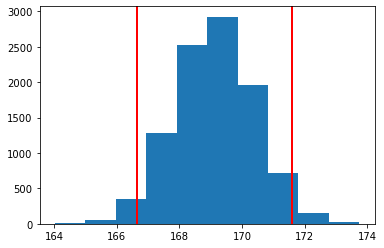

In [36]:
plt.hist(boot_means_np, alpha = 1)
plt.axvline(np.percentile(boot_means_np,2.5),color = 'red',linewidth=2)
plt.axvline(np.percentile(boot_means_np,97.5),color = 'red',linewidth=2)

---

# Question 2 Bootstrap and Standard Errors

# If you only know a median for a dataset of size 10, how do you calculate the standard error of the median? 

# Follow-up questions of bootstrap:
    - how many samples do I like? 
    - why? 
    - any bias/variance? 

In [82]:
import numpy as np 
# step 0: generate a population distribution of 100 elements
np.random.seed(123)
pop = np.random.randint(200,size = 100)

In [83]:
# step 1: take a random sample of size 10
np.random.seed(123)
sample_1= np.random.choice(pop,10)
sample_1

array([134, 139,   3, 153,  51, 146,  48, 139,   3, 168])

In [34]:
# step 2: what's the median of this sample (sample_1)?

# write a function to calculate the median value

def median_value(some):
    
    n = len(some)
    
    some.sort()
    
    if n % 2 == 0: 
        median1 = some[n//2]
        median2 = some[n//2-1]
        median = (median1+median2)/2
    
    else: 
        median = some[n//2]
        
    return median 

In [35]:
median_value(sample_1)

115.0

In [85]:
# step 3: repeatedly sample from the sample (sample_1) with replacement with the same sample size, aka. bootstrap

boot_sample_medians = []

for i in range(10000):
    
    boot_sample = np.random.choice(sample_1,replace = True, size = 10)
    
    boot_median = median_value(boot_sample)
    
    boot_sample_medians.append(boot_median)

In [87]:
# step 4: stand error and confidence interval  
# std
np.std(boot_sample_medians)

36.24544558530768

In [56]:
sum(boot_sample_medians)/len(boot_sample_medians) # the mean value of repeated samples' median values

106.5054

In [90]:
# C.I.
# wide CI for small sample sizes, b/c of limited sampling possibilities and large variation
boot_median_CI = np.percentile(boot_sample_medians, [2.5,97.5])
boot_median_CI

array([ 27., 146.])

---